<h3 align ='center'>Nvidia

<h4> Preparación de los Datos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nvidia_df = pd.read_csv("./Nvidia_stock_data.csv")
nvidia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6637 entries, 0 to 6636
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6637 non-null   object 
 1   Close   6637 non-null   float64
 2   High    6637 non-null   float64
 3   Low     6637 non-null   float64
 4   Open    6637 non-null   float64
 5   Volume  6637 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 311.2+ KB


In [3]:
nvidia_df.head()

,Date,Close,High,Low,Open,Volume
0,1999-01-22,0.037612,0.044775,0.035581,0.040119,2714688000
1,1999-01-25,0.041552,0.042029,0.037612,0.040597,510480000
2,1999-01-26,0.038328,0.042865,0.037731,0.042029,343200000
3,1999-01-27,0.038209,0.039403,0.036298,0.038447,244368000
4,1999-01-28,0.038089,0.038447,0.037850,0.038209,227520000


In [4]:
# Convirtiendo 'Date' a formato Datetime

nvidia_df['Date'] = pd.to_datetime(nvidia_df['Date'])

# Agregando columnas de Mes y Año para segmentar en estos períodos

nvidia_df['Year'] = nvidia_df['Date'].dt.year # Extrayendo el año del objeto Datetime
nvidia_df['Month'] = nvidia_df['Date'].dt.month # Extrayendo el mes del ojeto  Datetime
nvidia_df.set_index('Date', inplace = True) # Fijando la columna 'Date' como el indice del DataFrame

nvidia_df.head()

,Close,High,Low,Open,Volume,Year,Month
Date,,,,,,,
1999-01-22,0.037612,0.044775,0.035581,0.040119,2714688000,1999,1
1999-01-25,0.041552,0.042029,0.037612,0.040597,510480000,1999,1
1999-01-26,0.038328,0.042865,0.037731,0.042029,343200000,1999,1
1999-01-27,0.038209,0.039403,0.036298,0.038447,244368000,1999,1
1999-01-28,0.038089,0.038447,0.037850,0.038209,227520000,1999,1


<h4> Evolución histórica del precio de la acción.

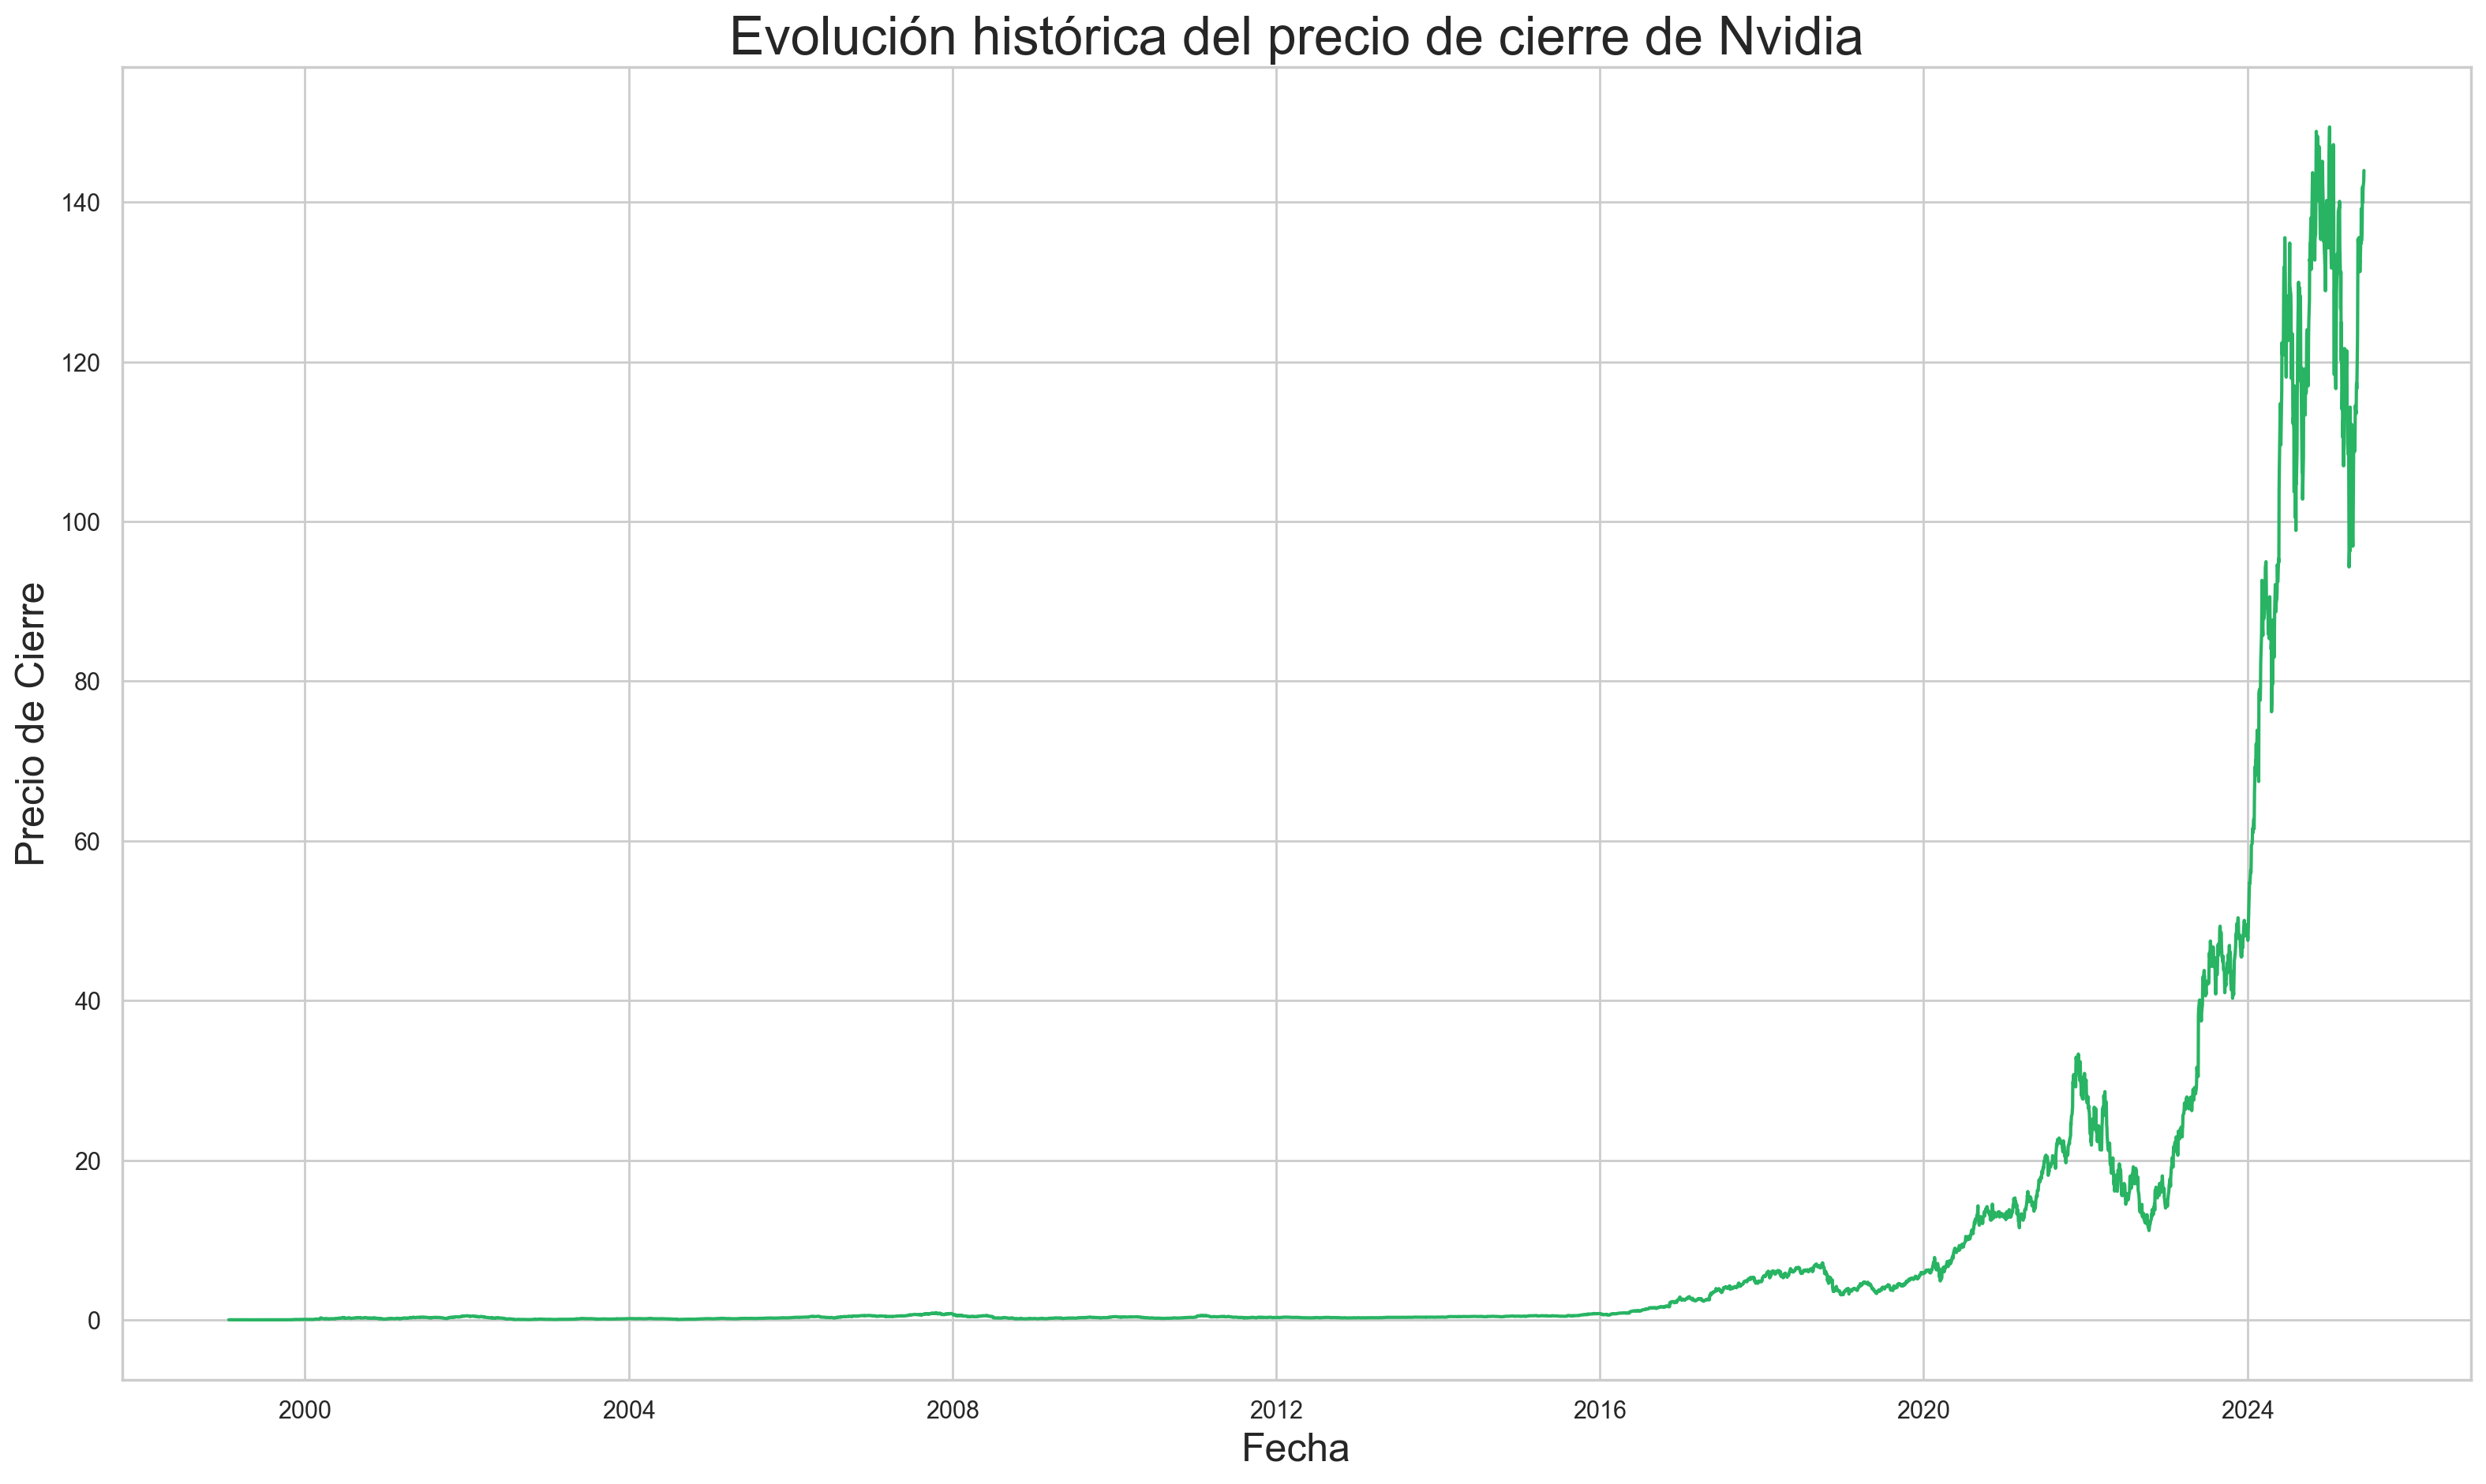

In [15]:
plt.figure(figsize=(19.2, 10.8), dpi = 200)

sns.set_theme(style="whitegrid")

sns.lineplot(
    data = nvidia_df,
    x = 'Date',
    y = 'Close',
    color = '#28b463',
    
)

plt.title('Evolución histórica del precio de cierre de Nvidia', fontsize = 24)
plt.xlabel('Fecha', fontsize = 18)
plt.ylabel('Precio de Cierre', fontsize = 18);

<p> Podemos observar un incremento explosivo del valor de cierre de las acciones Nvidia a partir del año 2020.

<h4> Análisis de crecimiento anual

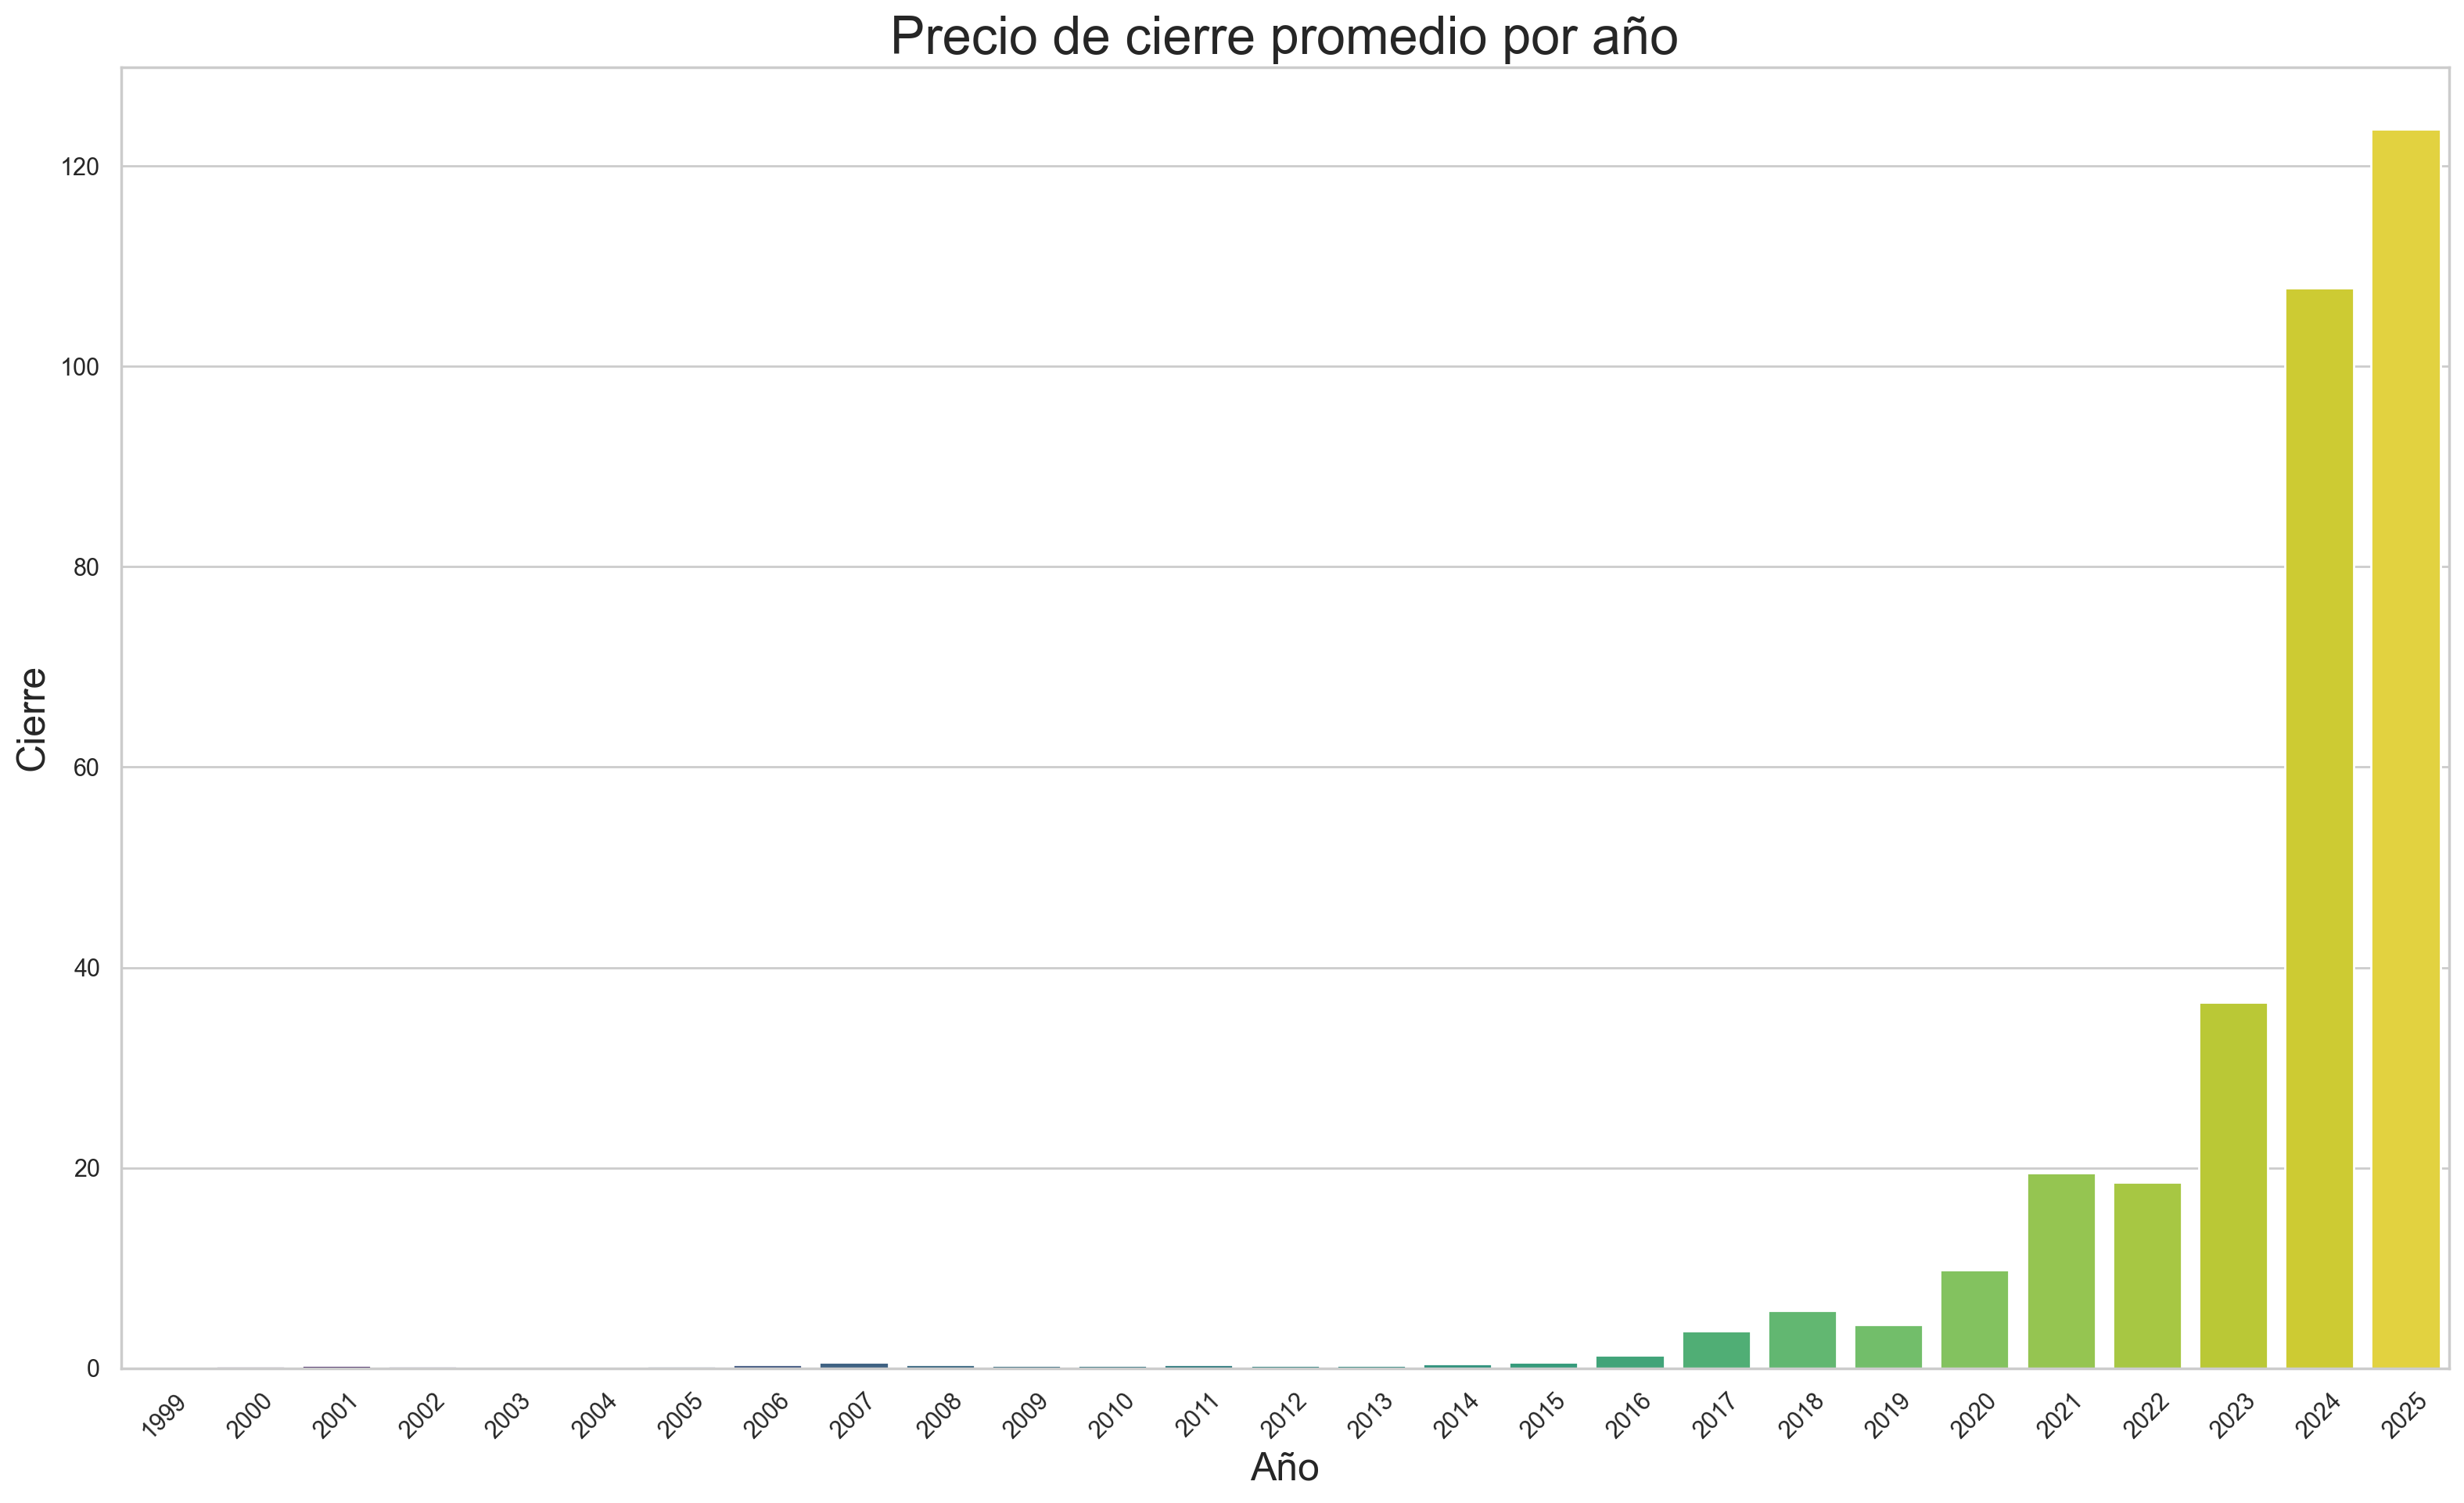

In [11]:
cierre_promedio_anual = nvidia_df.groupby('Year')['Close'].mean().reset_index()

plt.figure(figsize=(19.2, 10.8), dpi = 200)

sns.barplot(
    data = cierre_promedio_anual,
    x = 'Year',
    y = 'Close',
    palette = 'viridis',
    hue = 'Year',
    legend = False
)
plt.title('Precio de cierre promedio por año', fontsize = 24)
plt.xlabel('Año', fontsize = 18)
plt.ylabel('Cierre', fontsize = 18)
plt.xticks(rotation = 45);

<li> Podemos observar que el crecimiento del valor de cierre promedio anual, al igual que cuando observamos la evolucion del valor de cierre, muestra un fuerte crecimiento a partir del año 2020.
<li> Los valores de cierre a partir del 2020 son siempre mayores al anterior, salvo por el año 2022. 

<h4> Análisis de volatilidad

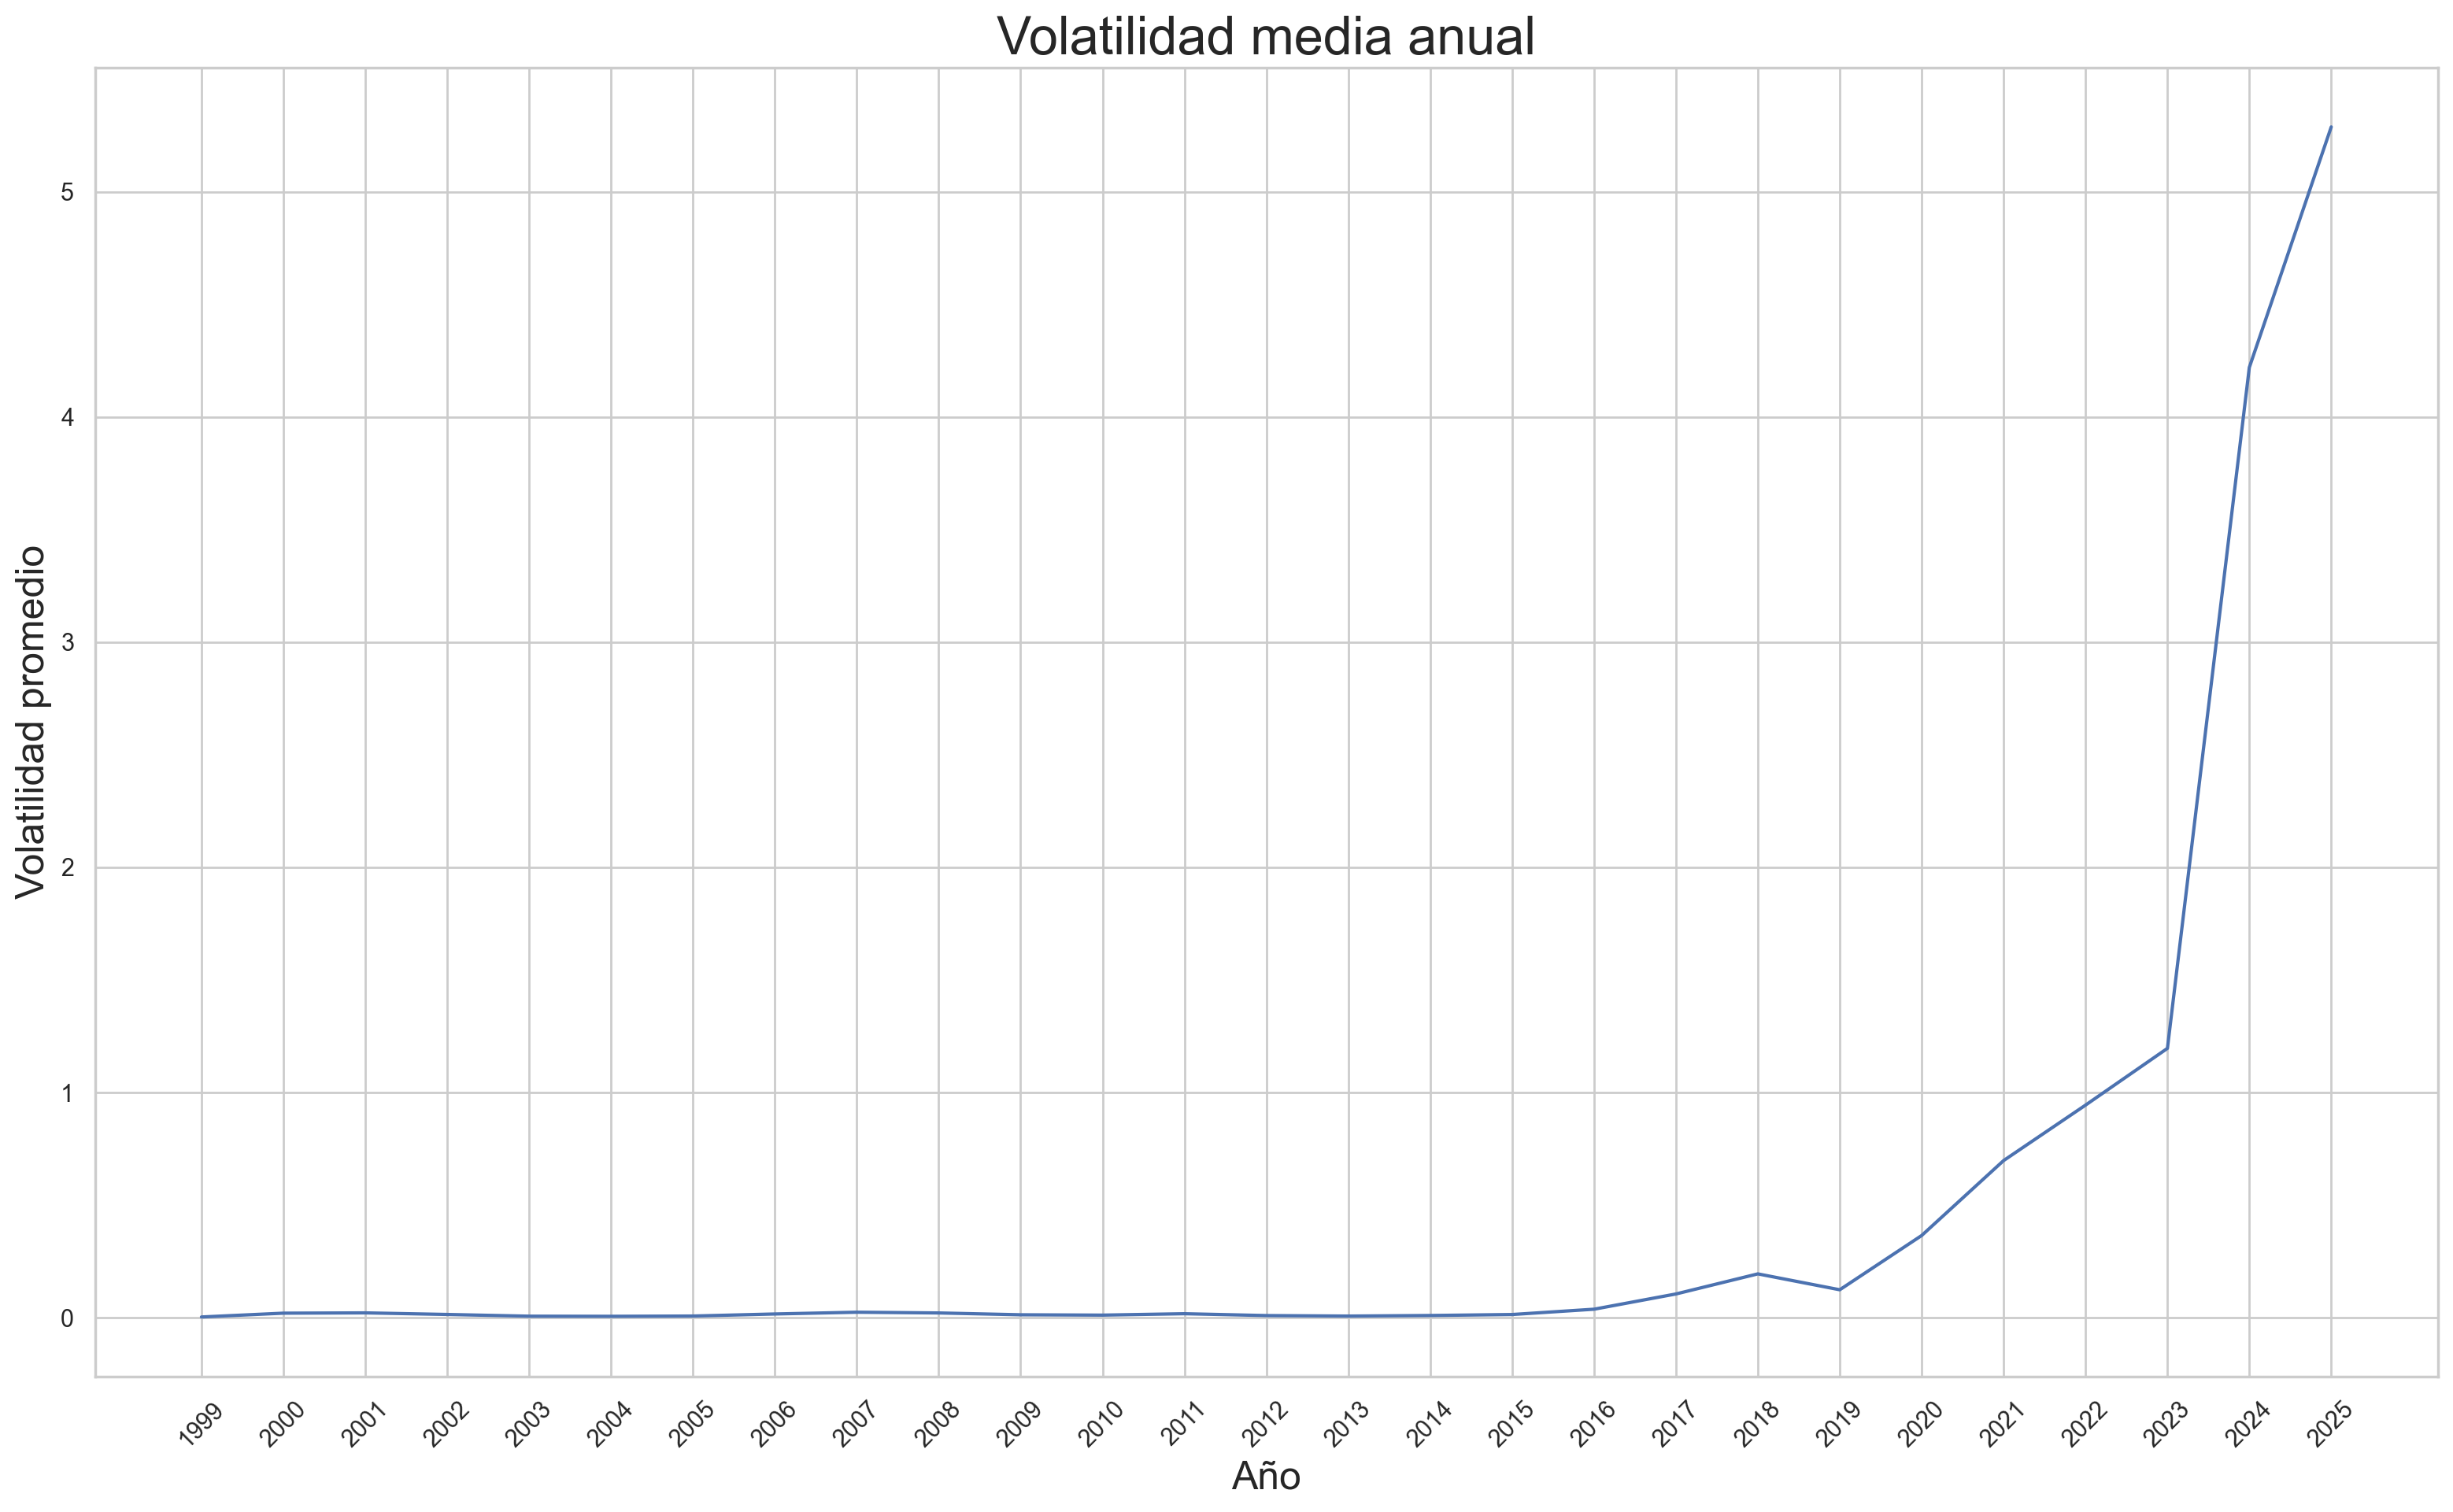

In [20]:
# Creando una nueva columna que mida el rango en el que se movió el precio de Nvidia en un determinado plazo
# Por defecto medirá diariamente

nvidia_df['Range'] = nvidia_df['High'] - nvidia_df['Low']

# Calculo de la volatilidad media por año
volatilidad = nvidia_df.groupby('Year')['Range'].mean()

# Gráfico de volatilidad media por año

plt.figure(figsize = (19.2, 10.8), dpi = 200)
sns.lineplot(
    x = volatilidad.index,
    y = volatilidad.values
)
plt.title("Volatilidad media anual", fontsize = 24)
plt.ylabel("Volatilidad promedio", fontsize = 18)
plt.xlabel('Año', fontsize = 18)
plt.xticks( ticks = volatilidad.index, rotation = 45);

<li> En el gráfico se puede observar que la volatilidad de Nvidia muestra un fuerte crecimiento a partir del año 2019.
<li> Este aumento precede el crecimiento explosivo del valor de cierre de Nvidia de los años siguentes, comenzando en el año 2020.

<h4> Matriz de correalción

,Open,High,Low,Close,Volume
Open,1.000000,0.999843,0.999777,0.999566,-0.183462
High,0.999843,1.000000,0.999755,0.999787,-0.182767
Low,0.999777,0.999755,1.000000,0.999833,-0.184546
Close,0.999566,0.999787,0.999833,1.000000,-0.183755
Volume,-0.183462,-0.182767,-0.184546,-0.183755,1.000000


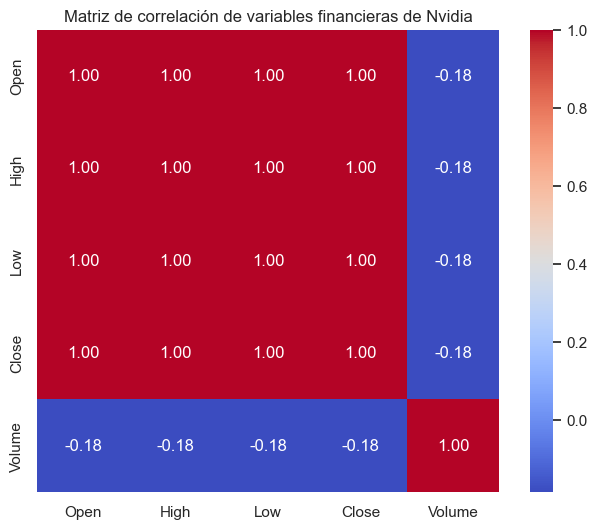

In [22]:
# Definiendo la matriz de correlación
correlation_matrix = nvidia_df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Matriz de correlación de variables financieras de Nvidia");

correlation_matrix

<p> Las variables Open, High, Low y Close tienen correlaciones positivas perfectas.
<li> Esta correalcion es comun en los datos bursatiles diarios, éstos tienden a moverse juntos
<li> Los datos son coherentes y limpios
<p>
<p> Las variables de Volume y todos los precios mustran una correlacion negativa y débil (-0.18)
<li> En este caso muestra que cuando los precios suben, el volumen no acompaña en una magnitud significativa y viceversa

<Figure size 3840x2160 with 0 Axes>

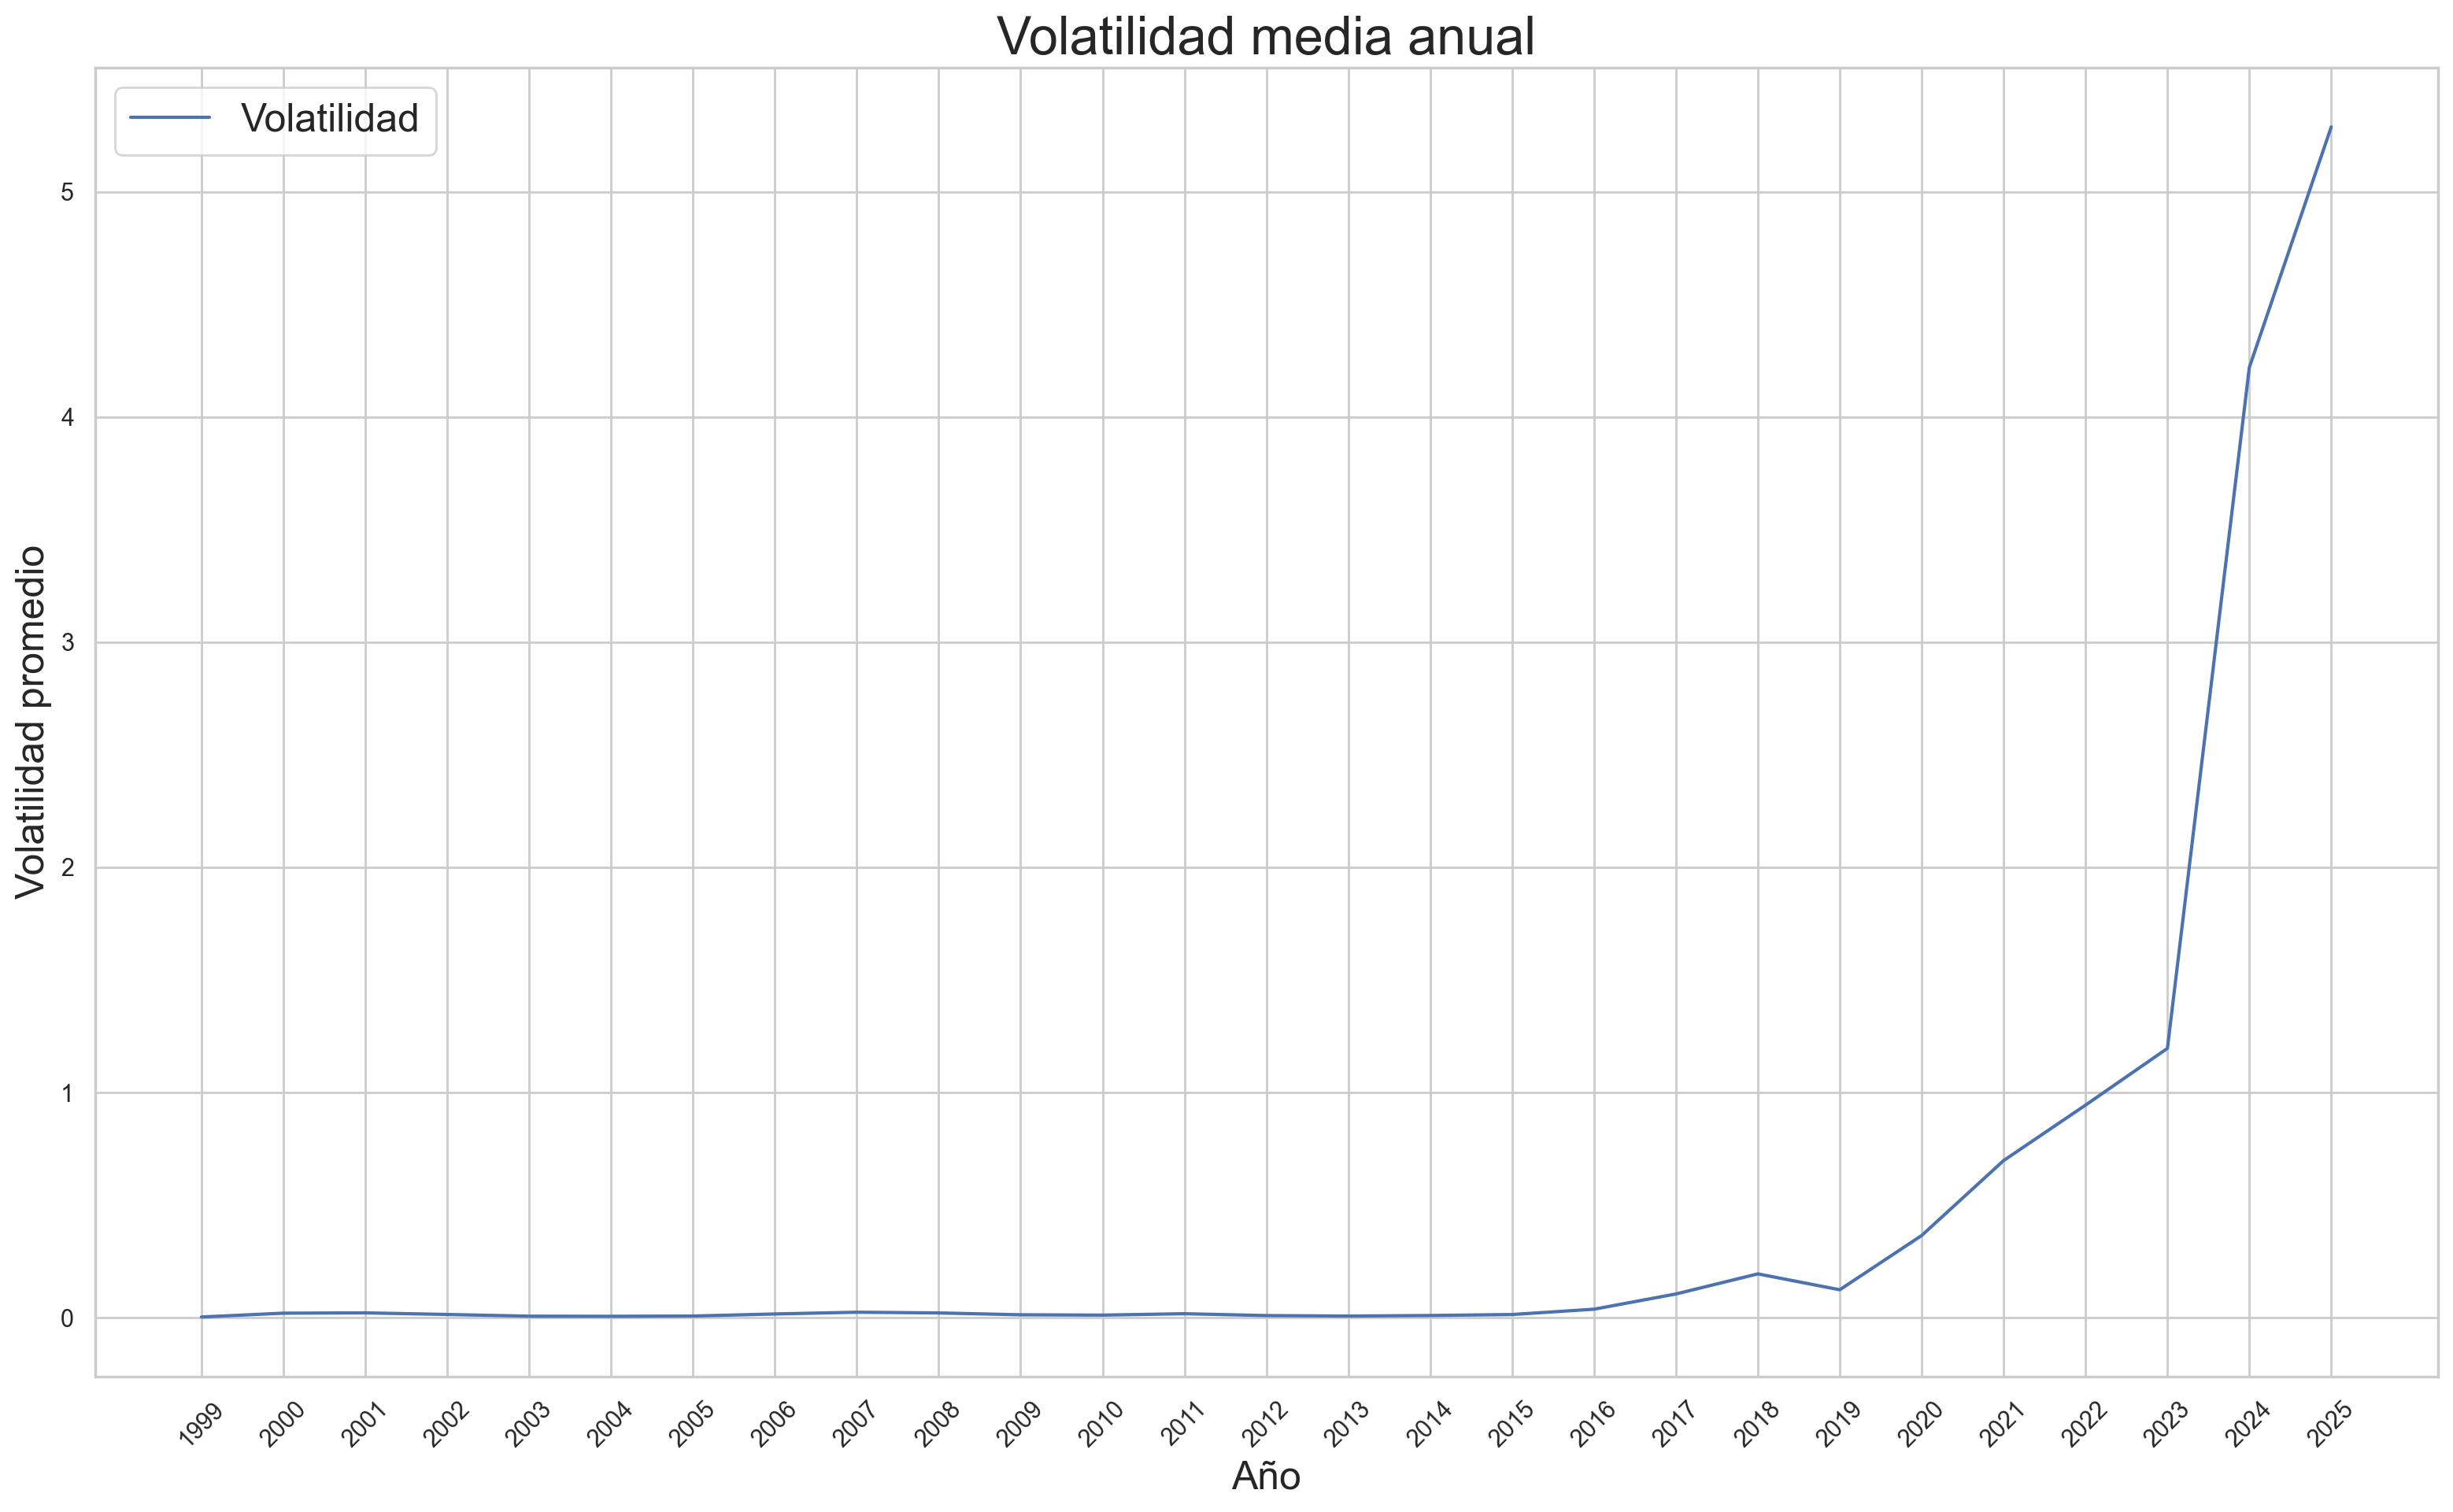

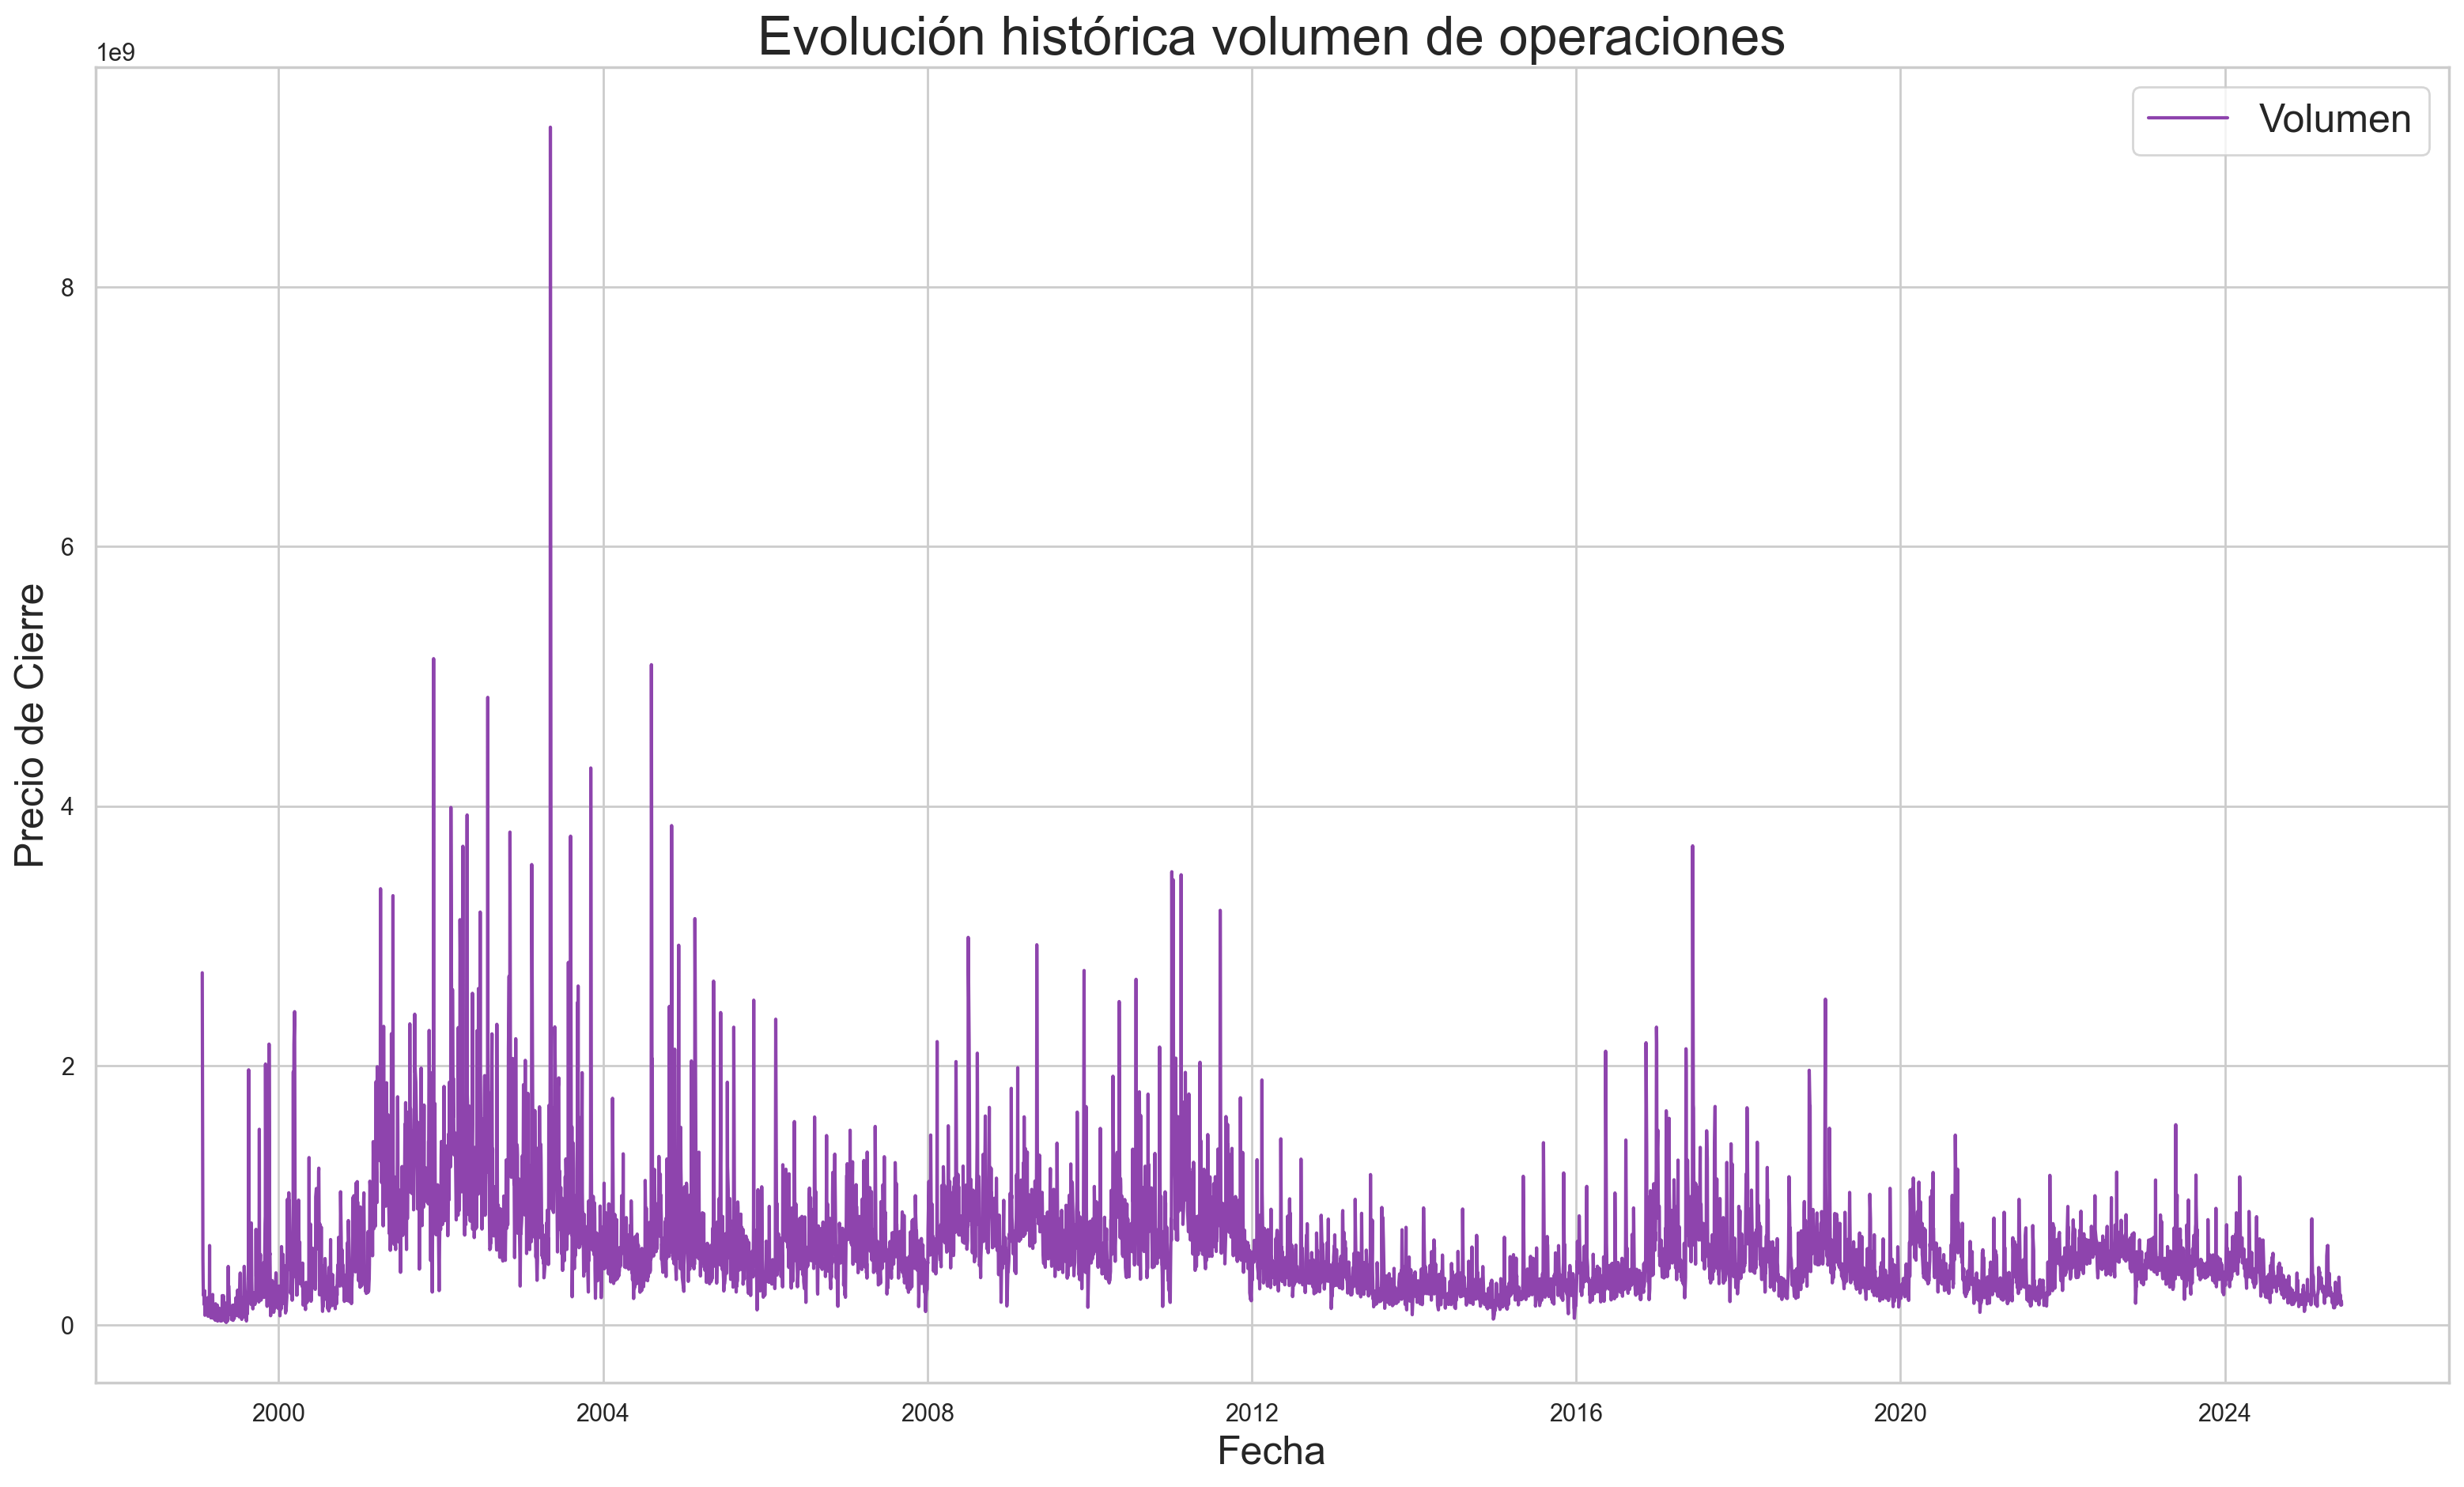

In [33]:
plt.figure(figsize=(19.2, 10.8), dpi = 200)

sns.set_theme(style="whitegrid")

# Calculo de la volatilidad media por año
volatilidad = nvidia_df.groupby('Year')['Range'].mean()

# Gráfico de volatilidad media por año

plt.figure(figsize = (19.2, 10.8), dpi = 200)
sns.lineplot(
    x = volatilidad.index,
    y = volatilidad.values,
    label = 'Volatilidad',
)
plt.title("Volatilidad media anual", fontsize = 24)
plt.ylabel("Volatilidad promedio", fontsize = 18)
plt.xlabel('Año', fontsize = 18)
plt.xticks( ticks = volatilidad.index, rotation = 45)
plt.legend(loc = 'upper left', fontsize = 18);

# Evolucion del volumen de operaciones
plt.figure(figsize=(19.2, 10.8), dpi=200)
sns.lineplot(
    data = nvidia_df,
    x = 'Date',
    y = 'Volume',
    color = '#8e44ad',
    label = 'Volumen'
)

plt.title('Evolución histórica volumen de operaciones', fontsize = 24)
plt.xlabel('Fecha', fontsize = 18)
plt.ylabel('Precio de Cierre', fontsize = 18)
plt.legend(loc = 'upper right', fontsize = 18);